# **Introduction**

---

This analysis will attempt to explore why customers churn from the business. This is important as finding the reasons for churn and acting upon those reasons, can retain customers and boost customer loyalty with the company. As a data analyst, it is important to analyze the data to find solutions to make strong data driven decisions for the business. In this case, I am tasked to find reasons on why customers Churn and find solutions to this problem

# *Data Understanding and Preprocessing*

---



In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries

import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

Import libraries used for data analysis and data mining

In [ ]:
# Read data
creditCardClients = pd.read_csv("/content/drive/MyDrive/IS 470_data/Telco-Customer-Churn.csv")
churn_rate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Import and read the dataset

In [ ]:
#examine number of rows and columns
churn_rate.shape

(7043, 21)

In [ ]:
#data keys
churn_rate.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Shows the names of all columns

Data Dictionary

- CustomerID: Each customers unique identifier
- Gender: Customer Gender
- Senior Citizen: if the customer is a citizen
- Partner: If the customer has a partner
- Dependents: If the customer has any dependents
- Tenure: How long the customer tenure is in months
- PhoneService: If the customer as phone service
- MultipleLines: If the customer has multiple phone lines
- InternetService: The type of internet service the customer has
- OnlineSecurity: If the customer has online security
- OnlineBackup: if the customer has a online backup
- DeviceProtection: if a customer's device has protection
- TechSupport: if the customer has techsupport in their plan
- StreamingTv: if the customer can stream tv in their plan
- StreamingMovie: if the customer can stream movies in their plan
- Contract: what type of contract the customer is locked into.
- PaperlessBilling: if the customer has Paperlessbilling (paper vs virtual)
- Payment method: how the customer pays for their plan.
- Monthly Charges: how much a customer gets charged per month
- Total Charges: total charges for a customer over their tenure.
- Churn: If a customer has Churned or not


In [ ]:
#select desired columns to look at
desired_columns = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'TechSupport', 'Contract', 'MonthlyCharges', 'TotalCharges', 'Churn']
churn_rate = churn_rate[desired_columns]
churn_rate

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,Contract,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Month-to-month,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,No,One year,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,No,Month-to-month,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,One year,42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,DSL,Yes,One year,84.80,1990.5,No
7039,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,One year,103.20,7362.9,No
7040,0,Yes,Yes,11,No,No phone service,DSL,No,Month-to-month,29.60,346.45,No
7041,1,Yes,No,4,Yes,Yes,Fiber optic,No,Month-to-month,74.40,306.6,Yes


I then select these desired keys which I thought would have an impact on churn rate to do further analysis on.

In [ ]:
#create data frame
CustomerChurn = churn_rate.copy()
CustomerChurn.loc[:, 'Churn'] = CustomerChurn['Churn'].replace({'No': 0, 'Yes': 1})
CustomerChurn

<ipython-input-205-d34d7320f1bd>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CustomerChurn.loc[:, 'Churn'] = CustomerChurn['Churn'].replace({'No': 0, 'Yes': 1})


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,Contract,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Month-to-month,29.85,29.85,0
1,0,No,No,34,Yes,No,DSL,No,One year,56.95,1889.5,0
2,0,No,No,2,Yes,No,DSL,No,Month-to-month,53.85,108.15,1
3,0,No,No,45,No,No phone service,DSL,Yes,One year,42.30,1840.75,0
4,0,No,No,2,Yes,No,Fiber optic,No,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,DSL,Yes,One year,84.80,1990.5,0
7039,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,One year,103.20,7362.9,0
7040,0,Yes,Yes,11,No,No phone service,DSL,No,Month-to-month,29.60,346.45,0
7041,1,Yes,No,4,Yes,Yes,Fiber optic,No,Month-to-month,74.40,306.6,1


Created a data frame for seperate analysis, then replace Customer churn values of 'No' and 'Yes' to 0 and 1.

In [ ]:
#examine any missing values
CustomerChurn.isnull().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
TechSupport,0
Contract,0
MonthlyCharges,0


Used the isnull() method to examine if there were any missing values.

In [ ]:
#show datatypes
CustomerChurn.dtypes

,0
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
TechSupport,object
Contract,object
MonthlyCharges,float64


In [ ]:
# Change data types
# Convert special keys to categorical and payments to integers

CustomerChurn['Partner'] = CustomerChurn['Partner'].astype('category')
CustomerChurn['Dependents'] = CustomerChurn['Dependents'].astype('category')
CustomerChurn['PhoneService'] = CustomerChurn['PhoneService'].astype('category')
CustomerChurn['MultipleLines'] = CustomerChurn['MultipleLines'].astype('category')
CustomerChurn['InternetService'] = CustomerChurn['InternetService'].astype('category')
CustomerChurn['TechSupport'] = CustomerChurn['TechSupport'].astype('category')
CustomerChurn['Contract'] = CustomerChurn['Contract'].astype('category')
CustomerChurn['SeniorCitizen'] = CustomerChurn['SeniorCitizen'].astype('category')
CustomerChurn['Churn'] = CustomerChurn['Churn'].astype('category')



CustomerChurn['MonthlyCharges'] = CustomerChurn['MonthlyCharges'].astype('int64')
CustomerChurn['TotalCharges'] = pd.to_numeric(CustomerChurn['TotalCharges'], errors='coerce').fillna(0).astype('int64')

#view new datatypes
CustomerChurn.dtypes

,0
SeniorCitizen,category
Partner,category
Dependents,category
tenure,int64
PhoneService,category
MultipleLines,category
InternetService,category
TechSupport,category
Contract,category
MonthlyCharges,int64


I change the keys to categorical or interger data types depending on what fits them best. I then view the newly changed datatypes.

In [ ]:
#Show data that is categorical
CustomerChurn.select_dtypes(include=['category'])

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,TechSupport,Contract,Churn
0,0,Yes,No,No,No phone service,DSL,No,Month-to-month,0
1,0,No,No,Yes,No,DSL,No,One year,0
2,0,No,No,Yes,No,DSL,No,Month-to-month,1
3,0,No,No,No,No phone service,DSL,Yes,One year,0
4,0,No,No,Yes,No,Fiber optic,No,Month-to-month,1
...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,Yes,Yes,DSL,Yes,One year,0
7039,0,Yes,Yes,Yes,Yes,Fiber optic,No,One year,0
7040,0,Yes,Yes,No,No phone service,DSL,No,Month-to-month,0
7041,1,Yes,No,Yes,Yes,Fiber optic,No,Month-to-month,1


I wanted to visually see the new keys that are only categorical

In [ ]:
#Show data that is not categorical
CustomerChurn.select_dtypes(exclude=['category'])

,tenure,MonthlyCharges,TotalCharges
0,1,29,29
1,34,56,1889
2,2,53,108
3,45,42,1840
4,2,70,151
...,...,...,...
7038,24,84,1990
7039,72,103,7362
7040,11,29,346
7041,4,74,306


I wanted to see the data that excluded categorical data types

In [ ]:
CustomerChurn.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.295897,2279.265086
std,24.559481,30.092727,2266.790864
min,0.000000,18.000000,0.000000
25%,9.000000,35.000000,398.000000
50%,29.000000,70.000000,1394.000000
75%,55.000000,89.000000,3786.500000
max,72.000000,118.000000,8684.000000


I wanted to further investigate the numeric variables.


**Subscription based services such as online streaming (Netflix, Hulu, HBO Max), Internet Plans (phone lines, internet/wifi), Food Delivery subscriptions (DoorDash, UberEats, Postmates) all have customer churning. As a data analyst, it is important to try and find factors that may indicate customer churn and face those challenges head on.**

**Hypothesis: Customers mostly churn if their monthly payments are too high. If the barrier for churning is also easy, then they will more likely Churn as they are not locked into the contract.**

Text(0.5, 0, 'Churn')

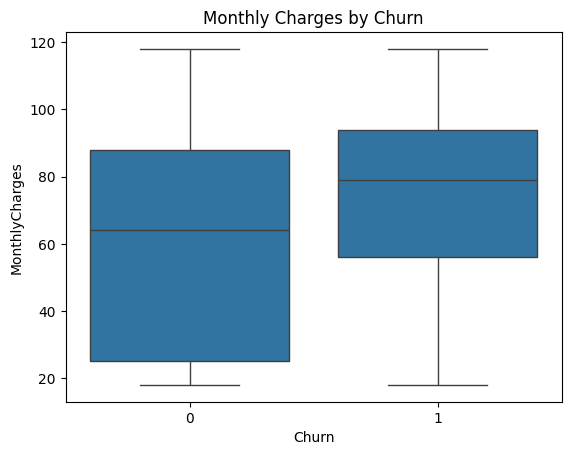

In [ ]:
#Distribution of monthly charges for customers who did not churn (0) versus those who churned (1)
snsplot = sns.boxplot(data=CustomerChurn, x='Churn', y='MonthlyCharges')
snsplot.set_title('Monthly Charges by Churn')
snsplot.set_xlabel('Churn')

I then created this box and whisker plot to better visually understand the distrubtion of customers and to test my hypothesis.

**Result**: Customers who churned often pay higher monthly charges with a smaller spread that those who did not churn. The IQR for those who churned is much higher than those who do not churn.

Text(0.5, 1.0, 'Monthly Charges by Tenure')

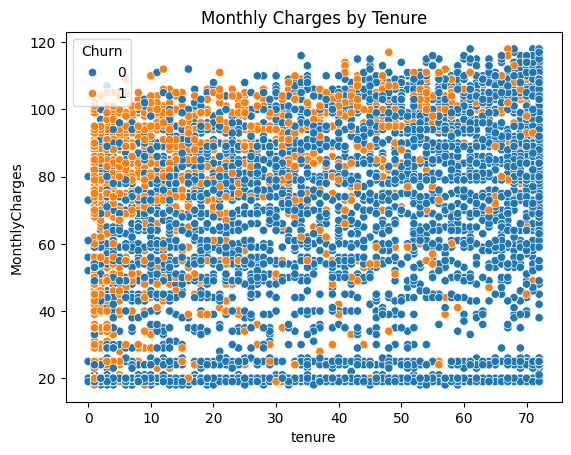

In [ ]:
#Scatter plot showing customers with a shorter tenure and higher monthly charges are more probable for churn (orange) than non-churn (blue)
snsplot = sns.scatterplot(data=CustomerChurn, x='tenure', y='MonthlyCharges', hue='Churn')
snsplot.set_title('Monthly Charges by Tenure')

I then create this scatterplot to further analyze another key factor of churn rate which is tenure. This scatterplot visually shows a customer that is churned, and how long their tenure was with their monthly charge rate. I theorized that those who have higher monthly charges, will often churn early and not have a long tenure.

**Result:** The scatterplot visually shows that this is true, as more customers who did churn (highlighted in orange) often do not have a long tenure and have higher monthly charges.

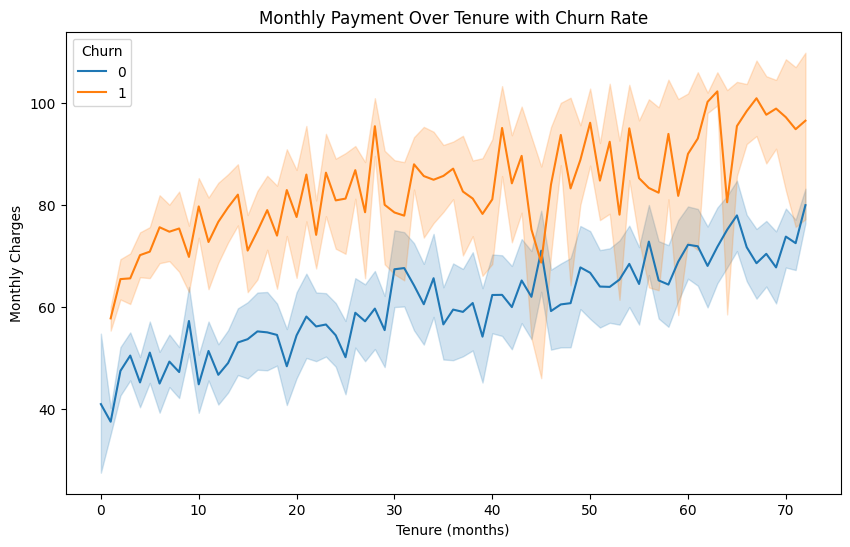

Churn Rate:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [ ]:
#Line plot visualizing the relationship betwen tenure (x-axis) and monthly charges (y-axis).
#Visualizes these two factors with churn and non churned customers.
#Each point on the line represents average monthly charge over tenure.
#Shaded regions indicating variability

plt.figure(figsize=(10, 6))
sns.lineplot(data=CustomerChurn, x='tenure', y='MonthlyCharges', hue='Churn')
plt.title('Monthly Payment Over Tenure with Churn Rate')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.show()

churn_rate = CustomerChurn['Churn'].value_counts(normalize=True) * 100
print(f"Churn Rate:\n{churn_rate}")


I wanted to analyze spending patterns of customers over time.

**Result:** One can visually see an incrase in monthly charges over tenure for both churn and non churned. This can be due to outside factors such as inflation, or internal factors such as increased pricing monthly/annually over time.
- with the shaded regions indicating variability, it further illustrates how much more often customers who churn (orange) will almost always pay more than those who do not churn given the same time frame. **(This is indicated by the white space in between the lines)**

**bold text**

<ipython-input-215-00a7502a2a03>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_churn = CustomerChurn.groupby(['Contract', 'Churn']).size().unstack()


Text(0, 0.5, 'Churn Rate (%)')

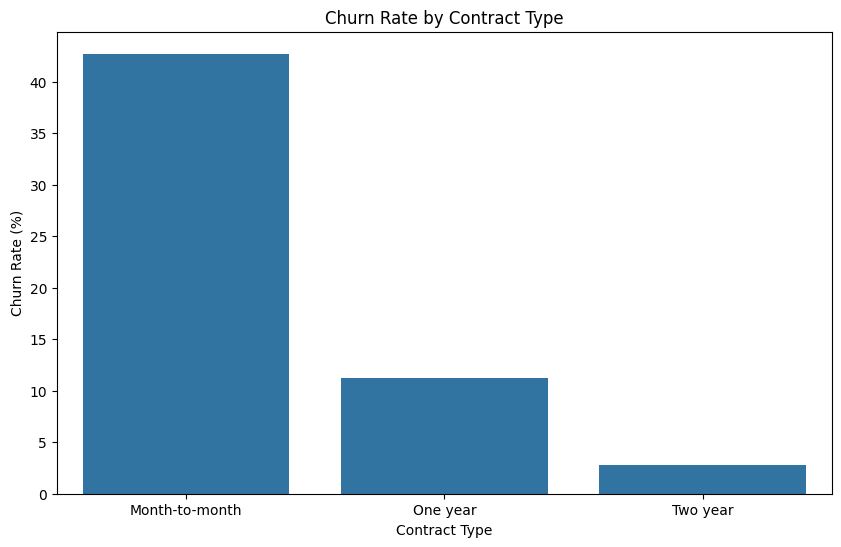

In [ ]:
#Bar chart that shows Churn% by contract type
contract_churn = CustomerChurn.groupby(['Contract', 'Churn']).size().unstack()
contract_churn['Churn Rate'] = (contract_churn[1] / (contract_churn[0] + contract_churn[1])) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=contract_churn.index, y='Churn Rate', data=contract_churn)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')

I wanted to see if contract type plays a part in customer churn rate as customers tend to churn more if it is easy for customers to opt out of a contract they agreed with prior.

This chart clearly shows the churn rate percentage for each contract type.

**Result**: **It is clear that contract type plays a large role in Churn rate % as those with a month to month contract churn way at over 40 percent, a big factor in customer decision making**

In [ ]:
# Calculate the average monthly payment per contract type
average_monthly_payment = CustomerChurn.groupby('Contract')['MonthlyCharges'].mean()
average_monthly_payment


<ipython-input-216-a837c1764d65>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_monthly_payment = CustomerChurn.groupby('Contract')['MonthlyCharges'].mean()


,MonthlyCharges
Contract,
Month-to-month,65.930839
One year,64.587237
Two year,60.305015


Given these calcualtions, we can correlate that higher monthly charge equals to higher churn rate by the graph above

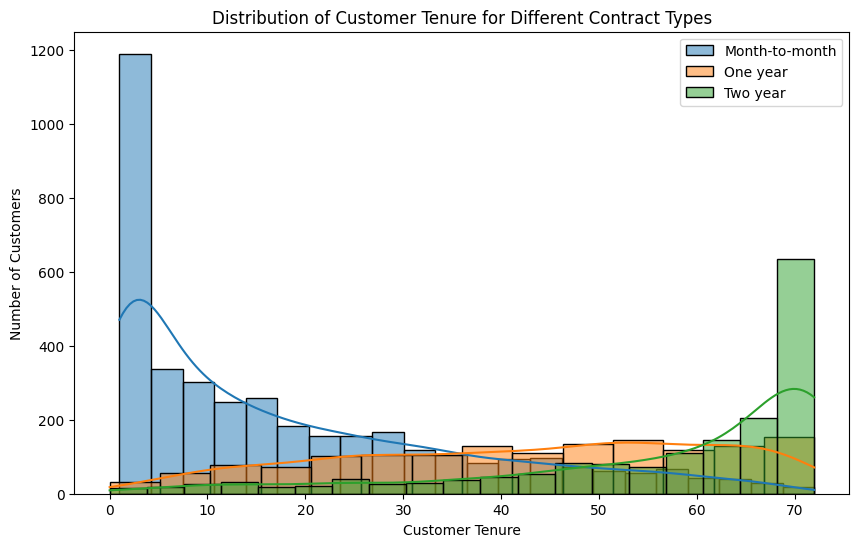

In [ ]:
#histogram that shows the distribution of customer tenure for different contract types

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for contract_type in CustomerChurn['Contract'].unique():
    sns.histplot(CustomerChurn[CustomerChurn['Contract'] == contract_type]['tenure'], label=contract_type, kde=True)
plt.title('Distribution of Customer Tenure for Different Contract Types')
plt.xlabel('Customer Tenure')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()


I wanted to visually see customer tenure distribution in the form of a histogram for all three contract types.

**Result: Evidence is clear that customers with a month to month contract, have higher churn rates indicated by the constant negative customer tenure over time.**
- customers with a one year contract see a small positive slope to customer tenure
- customers with a **two year contract** see a steady to strong positive slope of customer tenure, **indicating churn rate is lowest**

In [ ]:
CustomerChurn['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


# *Model Development*

---



In [ ]:
# Create Dummy variables

CustomerChurn = pd.get_dummies(CustomerChurn, columns=['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'TechSupport', 'Contract', 'SeniorCitizen',], drop_first=True, dtype=int)
CustomerChurn

,tenure,MonthlyCharges,TotalCharges,Churn,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,SeniorCitizen_1
0,1,29,29,0,1,0,0,1,0,0,0,0,0,0,0,0
1,34,56,1889,0,0,0,1,0,0,0,0,0,0,1,0,0
2,2,53,108,1,0,0,1,0,0,0,0,0,0,0,0,0
3,45,42,1840,0,0,0,0,1,0,0,0,0,1,1,0,0
4,2,70,151,1,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84,1990,0,1,1,1,0,1,0,0,0,1,1,0,0
7039,72,103,7362,0,1,1,1,0,1,1,0,0,0,1,0,0
7040,11,29,346,0,1,1,0,1,0,0,0,0,0,0,0,0
7041,4,74,306,1,1,0,1,0,1,1,0,0,0,0,0,1


Encode dummy variables to help make the decision tree

In [ ]:
target = CustomerChurn['Churn']
print(target.value_counts(normalize=True))

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


Analyze the proportion of the data

In [ ]:
#Partition the data
predictors = CustomerChurn.drop(['Churn'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.2, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(5634, 15) (1409, 15) (5634,) (1409,)


Preps the dataset for training and splits it into feature predictors and targets Churn. Test_size = 0.2 means 20% of data is used as the test set while 80% is used to train the model

In [ ]:
combined_train_df = pd.concat([predictors_train, target_train], axis=1)
combined_train_df

majority_df = combined_train_df[combined_train_df['Churn'] == 0]
minority_df = combined_train_df[combined_train_df['Churn'] == 1]

undersampled_majority_df = majority_df.sample(n=len(minority_df), random_state = 5)

undersampled_data = pd.concat([undersampled_majority_df, minority_df])

balanced_data = undersampled_data.sample(frac=1, random_state=5)

predictors_train = balanced_data.drop(columns=['Churn'])
target_train = balanced_data['Churn']

We must try to eliminate bias in our model, since in the original dataset there were more customers who did not Churn(0) than those who Churn(1). We don't want our model to be bias towards the majority.

In [ ]:
print(target_train.value_counts(normalize=True), target_train.shape)

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64 (3002,)


Makes sure the training data is balanced

In [ ]:
print(target_test.value_counts(normalize=True))

Churn
0    0.738822
1    0.261178
Name: proportion, dtype: float64


Makes sure the test data is not balanced

In [ ]:
model_DT = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 5)
model_DT.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

"Entropy" is used as the splitting factor. Random state is set to 1 to ensure it reproduces and the max depth is at 2 which limites the tree depth to 2 levels. This makes sure to prevent overfitting

[Text(0.6141304347826086, 0.9166666666666666, 'Contract_Two year <= 0.5\nentropy = 1.0\nsamples = 3002\nvalue = [1501, 1501]\nclass = No'),
 Text(0.34782608695652173, 0.75, 'Contract_One year <= 0.5\nentropy = 0.978\nsamples = 2492\nvalue = [1029.0, 1463.0]\nclass = Yes'),
 Text(0.4809782608695652, 0.8333333333333333, 'True  '),
 Text(0.17391304347826086, 0.5833333333333334, 'InternetService_Fiber optic <= 0.5\nentropy = 0.897\nsamples = 1954\nvalue = [613, 1341]\nclass = Yes'),
 Text(0.08695652173913043, 0.4166666666666667, 'tenure <= 5.5\nentropy = 0.996\nsamples = 746\nvalue = [347, 399]\nclass = Yes'),
 Text(0.043478260869565216, 0.25, 'TechSupport_No internet service <= 0.5\nentropy = 0.899\nsamples = 365\nvalue = [115, 250]\nclass = Yes'),
 Text(0.021739130434782608, 0.08333333333333333, 'entropy = 0.819\nsamples = 247\nvalue = [63.0, 184.0]\nclass = Yes'),
 Text(0.06521739130434782, 0.08333333333333333, 'entropy = 0.99\nsamples = 118\nvalue = [52, 66]\nclass = Yes'),
 Text(0.130

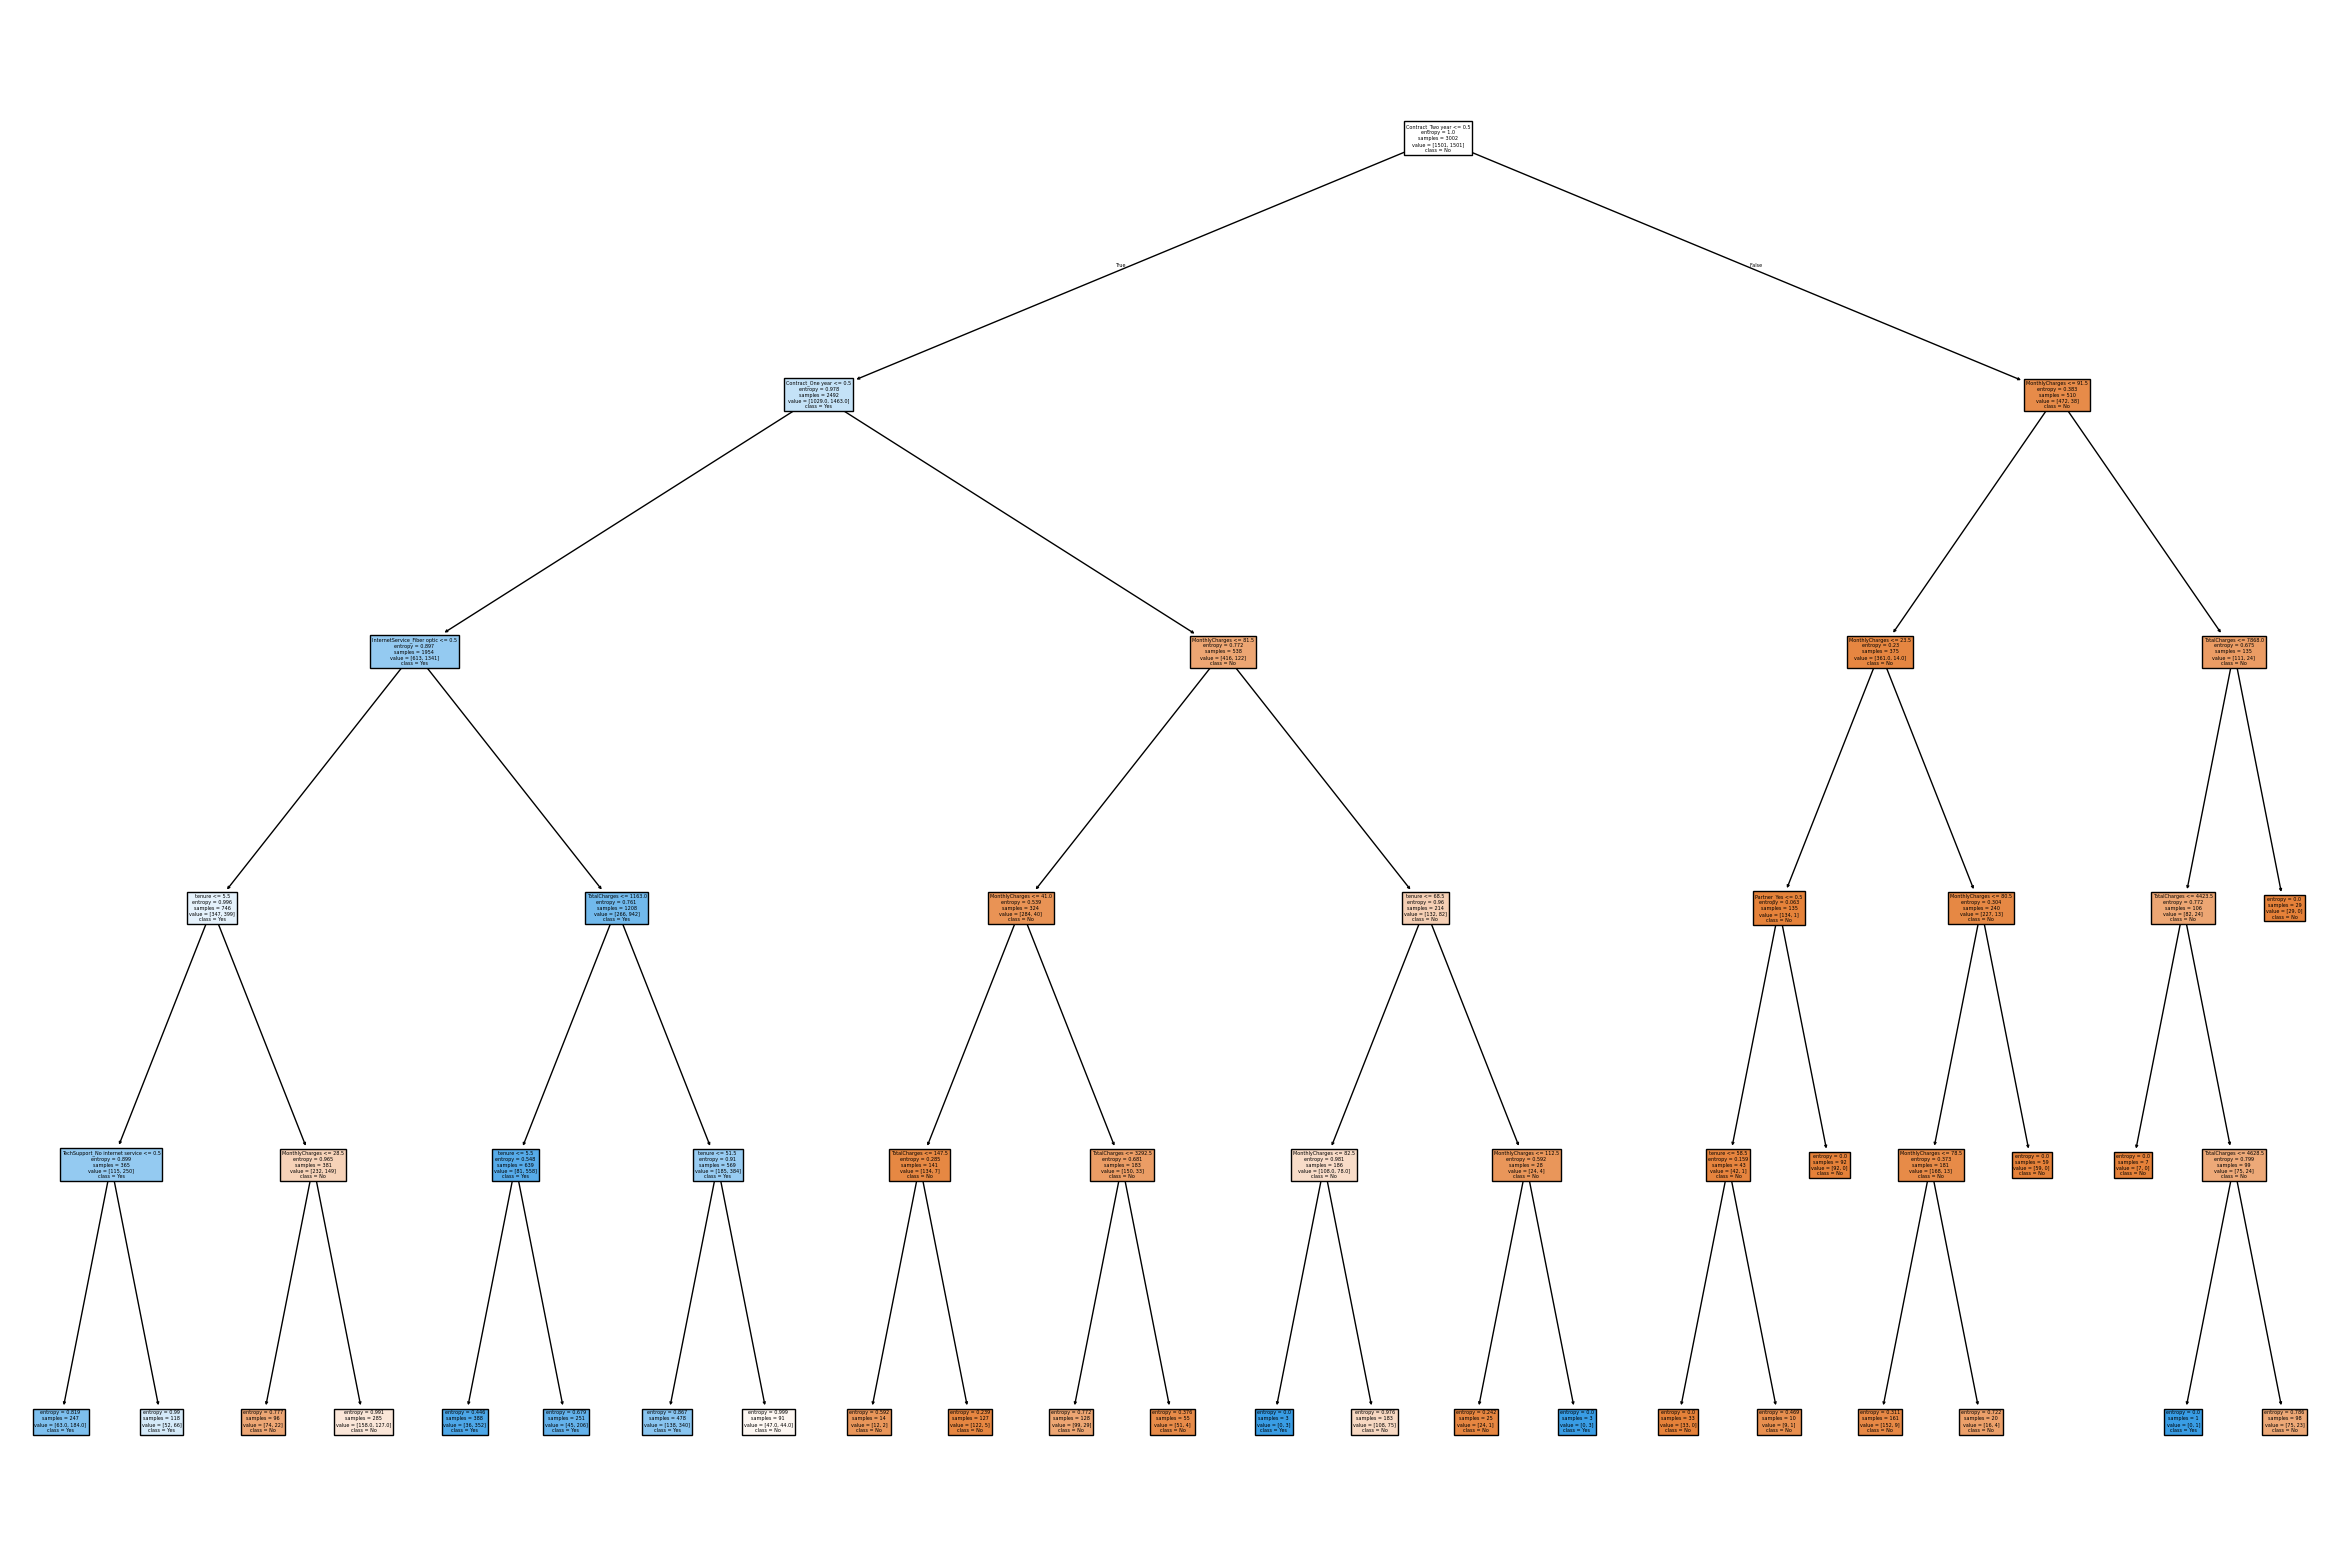

In [ ]:
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model_DT, feature_names=list(predictors_train.columns),class_names=['No', 'Yes'], filled=True)

In [ ]:
print(tree.export_text(model_DT, feature_names=list(CustomerChurn.columns)[1:]))

|--- Contract_Two year <= 0.50
|   |--- Contract_One year <= 0.50
|   |   |--- InternetService_Fiber optic <= 0.50
|   |   |   |--- MonthlyCharges <= 5.50
|   |   |   |   |--- TechSupport_No internet service <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- TechSupport_No internet service >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- MonthlyCharges >  5.50
|   |   |   |   |--- TotalCharges <= 28.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- TotalCharges >  28.50
|   |   |   |   |   |--- class: 0
|   |   |--- InternetService_Fiber optic >  0.50
|   |   |   |--- Churn <= 1163.00
|   |   |   |   |--- MonthlyCharges <= 5.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- MonthlyCharges >  5.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Churn >  1163.00
|   |   |   |   |--- MonthlyCharges <= 51.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- MonthlyCharges >  51.50
|   |   |   |   |   |--- class: 0
|   |--- Contract_One year >  

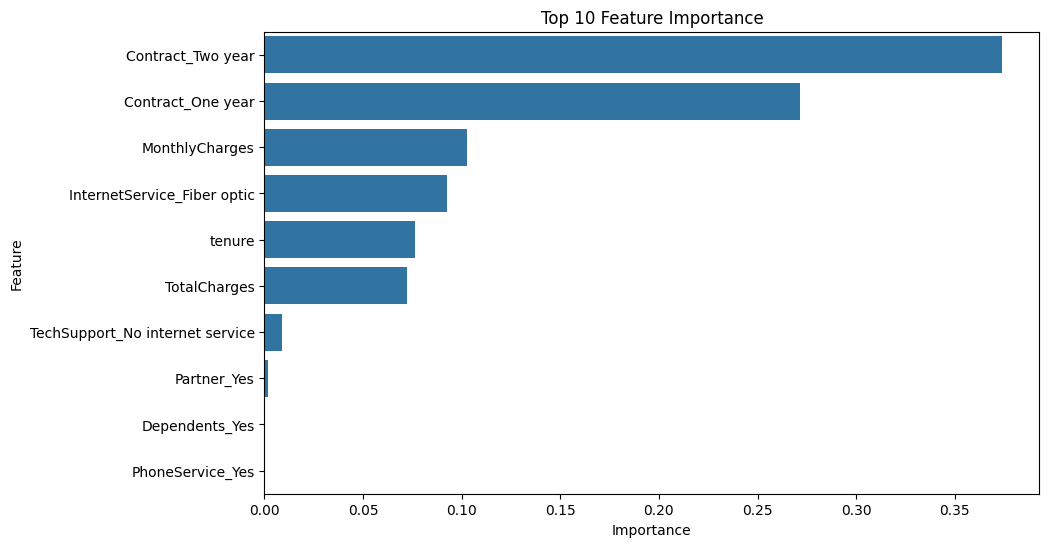

In [ ]:
importances = model_DT.feature_importances_
feature_names = list(predictors_train.columns)
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_10_features = feature_importance_df.head(10)

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, orient='h')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# *Results and Model Evaluation*

---



In [ ]:
prediciton_on_test_DT = model_DT.predict(predictors_test)

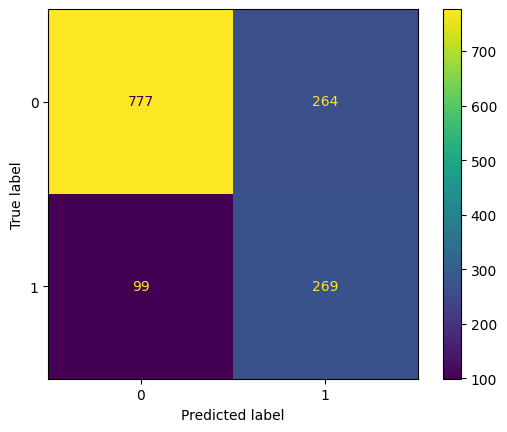

In [ ]:
cm_DT = confusion_matrix(target_test, prediciton_on_test_DT)
ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=model_DT.classes_).plot()

Confusion Matrix

In [ ]:
print(classification_report(target_test, prediciton_on_test_DT))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1041
           1       0.50      0.73      0.60       368

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.74      0.75      1409



No Churn (0): Precision = 0.89. This model predicts No Churn at 89%. Recall = 0.75. This model correctly identifies 75% of actual non churners. F1 Score = 0.81. This means 0.81 is the balance between precision and recall

Churn (1): Precision = 0.50. This model predicts Churn at 50%. Recall = 0.73. This model correctly identifies 73% of actual churners. F1 Score = 0.60. This means 0.60 is the balance between precision and recall

Overall accracy is 0.74 = 74% which means the model correctly predicts 74% of the time.
Macro avg is the scores given to the average performance of both classes equally while weighted avg is the scores given to the class with more weight



# *Conclusion*

---



Customer Churn rate is a key performance indicator in many businesses that can indicate a companies stengths and struggles. As a data analyst, it is crucial to know how to identify problems and recommend solutions to potential causes for churn. Given a large data set one can come up with solutions to help a business make smart data driven decisions.



To start off in finding why customers churn I wanted to find out key factors on why customers leave. Naturally two ideas came to mind which was **monthly payments and contract type**. Customers will tend to stop doing business with a business if it is too expensive and if it is easy to leave.

I wanted to see if this hypothesis was true and it turned out to be correct. I tested my hypothesis by running 3 graphs of monthly charges by churn, monthly charges by tenure, and monthly charges over tenure (comparing both churn and not churn for all three graphs). All graphs were in favor of those who churned have higher monthly payments

Then I wanted to see if contract type had significant reason for customers to churn. It turns out after running two graphs that show churn rate to contract type and customer tenure to contract type it is clear. Both graphs indicate that higher churn rates correlate with a short contract type, especially month to month. I then ran a feature importance graph after my decision tree to see what keys features has the most importance. Turns out I was correct in my hypothesis that monthly payments and contract types had the highest feature importance

**To conclude, contract type and monthly payments have high feature importance when investigating customer churn.** These two factors go hand in hand with making customers leave. To retain customers and lower churn rate, I would suggest to differ away from monthly contracts and higher average monthly payments.

---



The effectiveness of the decision tree model is very specific. If you are a business and want to find customers who did not churn it is at 89% which is very high, while customers who did churn it correctly predicts at 50%, however it correctly identifies 73% of actual churners. If you are looking for an effective model to find customers who did not churn and to find customers who actually churned, then this model would be considered reliable. The strength to this approach was that it honed in on two target features, making the apporach more simple. However, it actually can cause limitation because since it is such a simple apporach, a more advanced data mining technique could potentially have been used for better analysis.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/IS 470_data/IS470Assignment1.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/IS 470_data/IS470Assignment1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 1524596 bytes to /content/drive/MyDrive/IS 470_data/IS470Assignment1.html
